In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers , Input
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 100
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato_data",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
# Define the path to your dataset
dataset_path = "potato_data"

# Dictionary to store class image counts
class_counts = {}

# Loop through each class directory
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    
    # Count the number of images in each class directory
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

# Display the number of images in each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")


Class 'Potato___Early_blight': 1000 images
Class 'Potato___healthy': 152 images
Class 'Potato___Late_blight': 1000 images


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for images_batch, labels_batch in dataset.take(1):
    print(images_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 2 1 0]


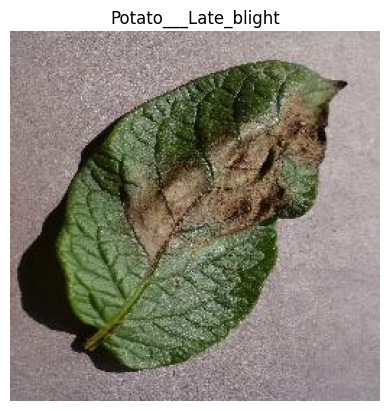

In [8]:
for images_batch, labels_batch in dataset.take(1):
    plt.imshow(images_batch[0].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[0]])
    plt.axis("off")

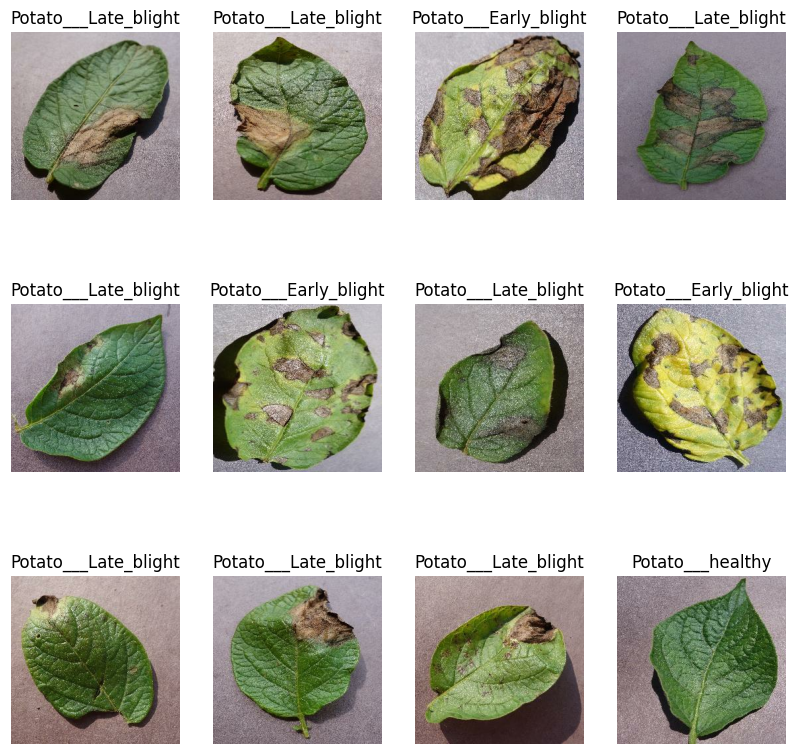

In [9]:
plt.figure(figsize=(10, 10))
for images_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [10]:
#train_size = 0.8
#len(dataset)*train_size

In [11]:
#train_ds = dataset.take(54)
#len(train_ds)

In [12]:
#test_ds = dataset.skip(54)
#len(test_ds)

In [13]:
#val_size = 0.1
#len(dataset)*val_size

In [14]:
#val_ds = test_ds.take(6)
#len(val_ds)

In [15]:
#test_ds = test_ds.skip(6)
#len(test_ds)

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds= ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(train_ds)

54

In [19]:
len(val_ds)

6

In [20]:
len(test_ds)

8

In [21]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [24]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS )
n_classes = 3
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(256,256,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')  
])


c:\Users\souri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\souri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 534ms/step - accuracy: 0.4690 - loss: 0.9269 - val_accuracy: 0.5312 - val_loss: 0.8033
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 538ms/step - accuracy: 0.6357 - loss: 0.7214 - val_accuracy: 0.7396 - val_loss: 0.5605
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 506ms/step - accuracy: 0.7978 - loss: 0.4646 - val_accuracy: 0.8073 - val_loss: 0.4496
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 506ms/step - accuracy: 0.8337 - loss: 0.3841 - val_accuracy: 0.8490 - val_loss: 0.3277
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 549ms/step - accuracy: 0.8941 - loss: 0.2838 - val_accuracy: 0.8906 - val_loss: 0.2783
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 525ms/step - accuracy: 0.9287 - loss: 0.1946 - val_accuracy: 0.9219 - val_loss: 0.2192
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 493ms/step - accuracy: 0.9444 - loss: 0.1630 - val_accuracy: 0.7396 - val_loss: 0.8456
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 506ms/step - accuracy: 0.8978 - loss: 0.2501 - 

In [28]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.9973 - loss: 0.0135


In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

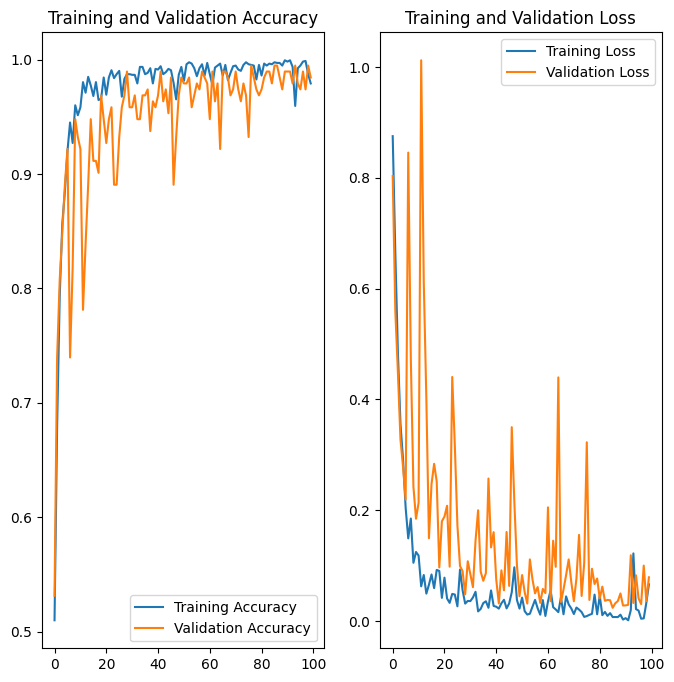

In [31]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


In [32]:
for images_batch, labels_batch in test_ds.take(1):

    print(images_batch[0].numpy())

[[[133. 140. 159.]
  [135. 142. 161.]
  [136. 143. 162.]
  ...
  [ 83.  86. 105.]
  [ 91.  94. 113.]
  [ 96.  99. 118.]]

 [[137. 144. 163.]
  [138. 145. 164.]
  [139. 146. 165.]
  ...
  [100. 103. 122.]
  [100. 103. 122.]
  [ 96.  99. 118.]]

 [[136. 143. 162.]
  [137. 144. 163.]
  [137. 144. 163.]
  ...
  [101. 104. 123.]
  [ 96.  99. 118.]
  [ 89.  92. 111.]]

 ...

 [[160. 165. 184.]
  [156. 161. 180.]
  [156. 161. 180.]
  ...
  [124. 126. 138.]
  [117. 119. 131.]
  [110. 112. 124.]]

 [[162. 167. 186.]
  [157. 162. 181.]
  [157. 162. 181.]
  ...
  [127. 129. 141.]
  [121. 123. 135.]
  [113. 115. 127.]]

 [[160. 165. 184.]
  [156. 161. 180.]
  [156. 161. 180.]
  ...
  [130. 132. 144.]
  [122. 124. 136.]
  [113. 115. 127.]]]


Original Class: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
96
[9.9999928e-01 7.2801600e-07 6.8102198e-18]
0
Predicted Class: Potato___Early_blight


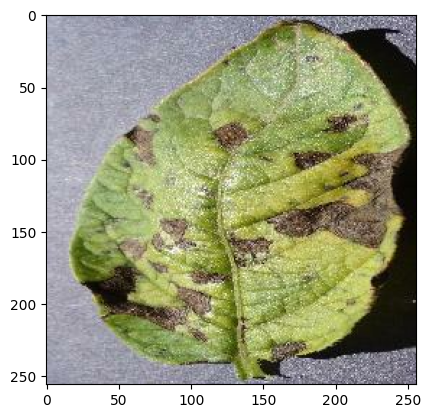

In [33]:
for images_batch, labels_batch in test_ds.take(1):
    print('Original Class:',class_names[labels_batch[0].numpy()])
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    

    batch_prediction = model.predict(images_batch)
    
    print(batch_prediction.size)
    print(batch_prediction[0])
    print(np.argmax(batch_prediction[0]))
    print('Predicted Class:',class_names[np.argmax(batch_prediction[0])])


In [34]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class , confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


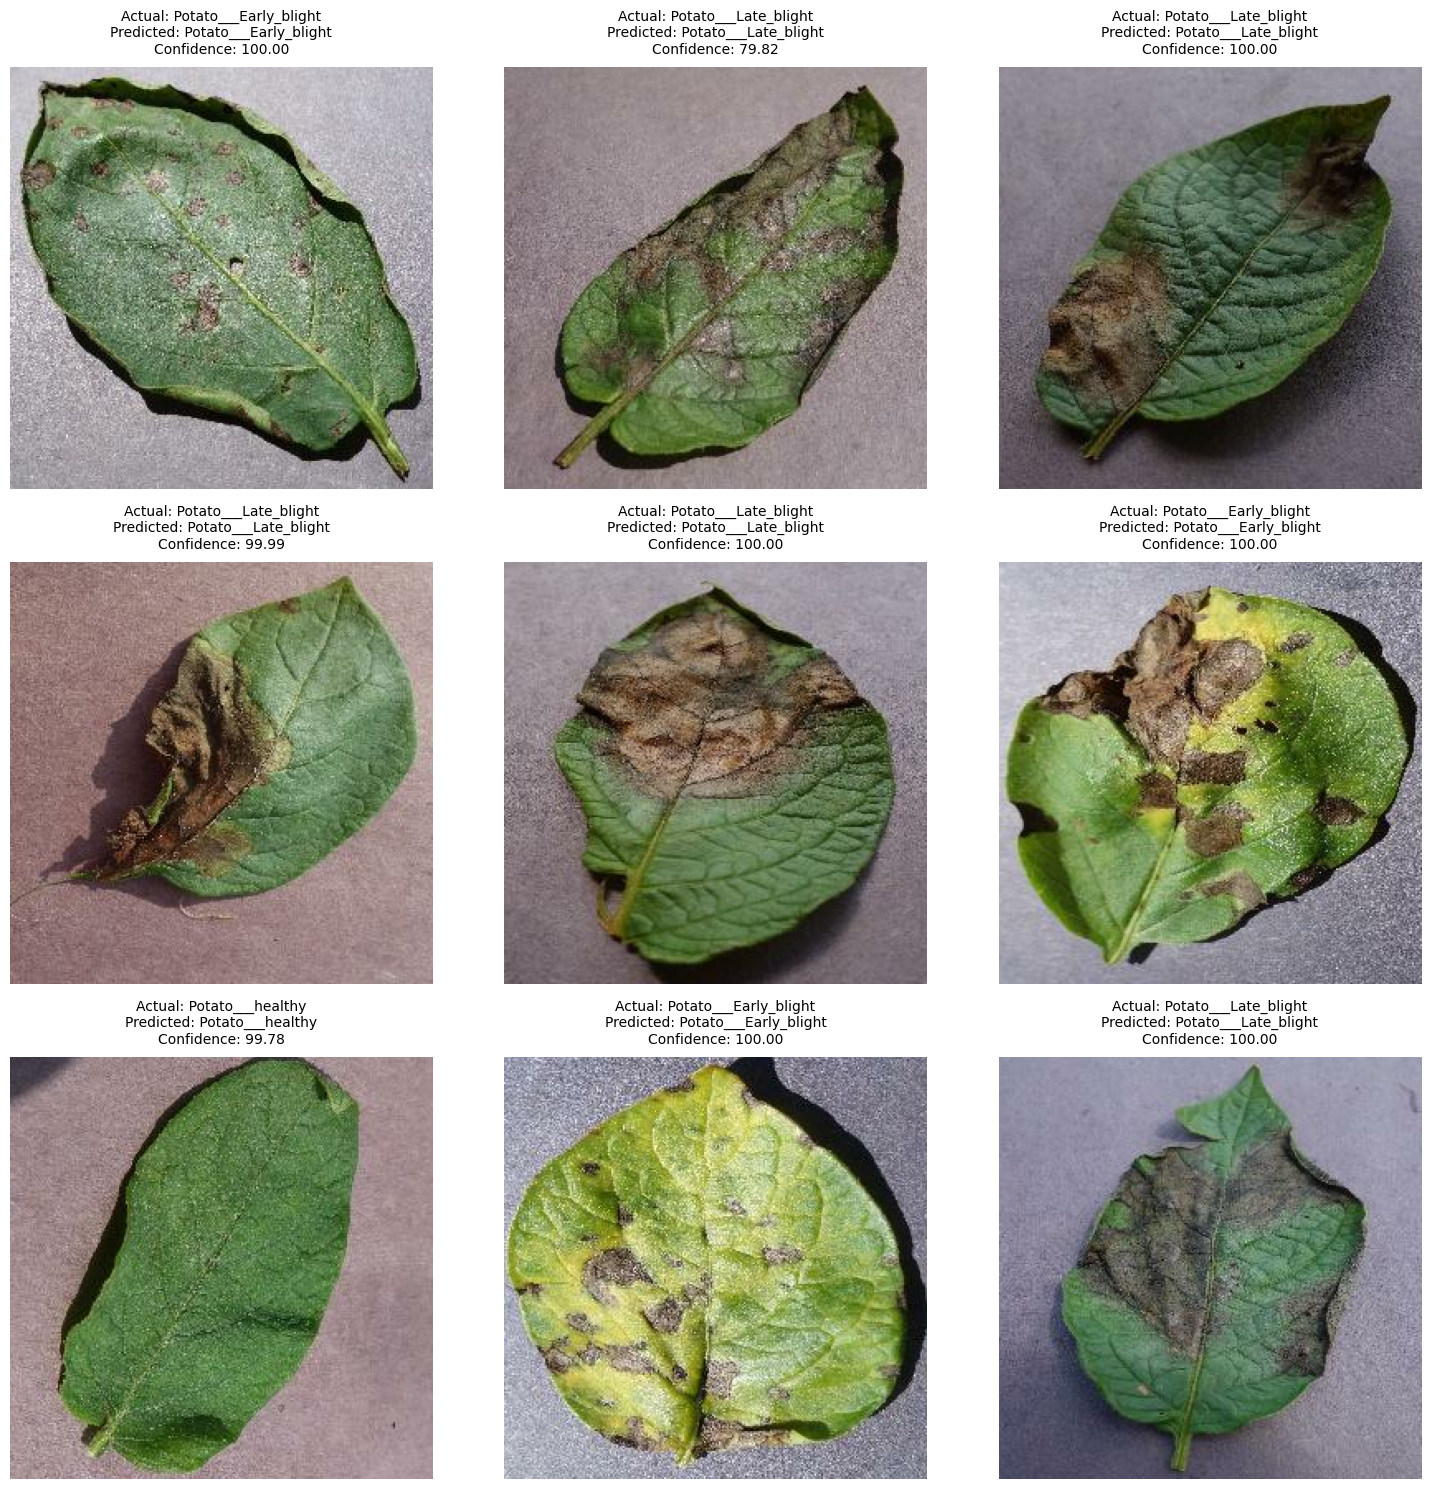

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        # Customize the title with smaller font and extra line spacing
        plt.title(
            f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}",
            fontsize=10, 
            pad=10, 
            ha="center"  # Center align title
        )
        plt.axis('off')
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


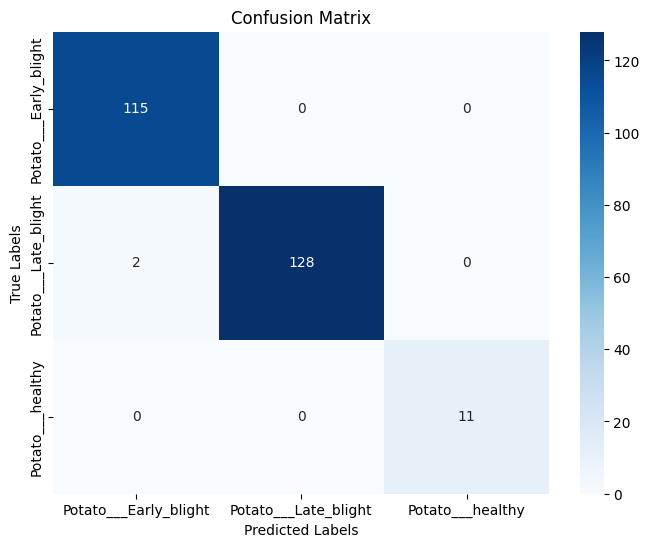

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming `test_ds` is your test dataset and `class_names` contains your labels
# Example class names for Potato disease detection
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# Get true labels and predicted labels
true_labels = []
predicted_labels = []

# Go through the test dataset batch by batch
for images, labels in test_ds:
    predictions = model.predict(images)  # Predict on each batch
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [37]:
# Set the model version and relative directory path
model_version = 1
base_path = "models"
model_path = os.path.join(base_path, f"version_{model_version}.keras")  

# Ensure the 'models' directory exists
os.makedirs(base_path, exist_ok=True)

# Save the model in the specified path
model.save(model_path)


In [38]:
#model.save("potato_disease_model_1.h5")


In [39]:
#from tensorflow.keras.models import load_model

# Load the model from the directory
#model = load_model("models/version_1")

# Use the model for predictions
#predictions = model.predict(new_data)
